# Logistic Regression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
dataset = load_breast_cancer()

In [4]:
df = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
df["target"] = dataset.target
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [5]:
X = df[dataset.feature_names].values
y = df["target"].values.reshape(-1,1)

X.shape, y.shape

((569, 30), (569, 1))

In [6]:
def linear_model_format_X(X):
    if len(X.shape) == 1:
        X = X.copy().reshape(-1,1)
    
    return np.hstack(tup= ( np.ones(shape=(X.shape[0],1)) , X ) )

## Cost Function

In [7]:
def entropy_cost_func(y_pred,y):
    
    part_1 = y * np.log(y_pred)
    
    part_2 = (1 - y) * np.log(1 - y_pred) 
    
    cost = ( -1 / y_pred.shape[0] ) * np.sum(part_1 + part_2)   
    return cost

## Sigmoid Function

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Gradient Descent Algorithm

In [53]:
def logistic_regression_fit(X_i,y,alpha = 0.01,iterations = 10000):    
    X = linear_model_format_X(X_i)
    
    n = X.shape[1]
    m = y.shape[0]
    
    theta = np.random.rand(1,n)
    print("random initial θ value :",theta)

    cost_history = []
    theta_history = []

    for iteration in range(iterations):

        # calculate y_pred 
        y_pred = sigmoid(X @ theta.T) # (m,1) = (m,n) * (n,1)

        # new θ to replace old θ
        new_theta = np.zeros_like(theta)     

        # simultaneous operation 
        new_theta = theta - (
            alpha * np.sum( (y_pred - y ) * X , axis = 0 ) * (1/m)
        )
        

        if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
            print("breaking. found inf or nan.")
            break
        # override new θ 
        theta = new_theta

        # calculate cost to put in history
        cost = entropy_cost_func( sigmoid(X @ theta.T), y)
        cost_history.append(cost)

        # calcualted theta in history
        theta_history.append(theta[0])
        
    y_pred = sigmoid(X @ theta.T)
    return X,y,y_pred,theta,theta_history,cost_history

random initial θ value : [[0.3576646  0.53958774 0.10850964 0.5250561  0.80609266 0.60385399
  0.61962548 0.44928318 0.50598448 0.45210756 0.67919445 0.60685172
  0.09844742 0.41804907 0.94736686 0.05573498 0.57776977 0.43239714
  0.7550938  0.94571158 0.20910021 0.79688015 0.11840221 0.35933478
  0.20626876 0.85741615 0.6695789  0.67703857 0.71845608 0.06580761
  0.77958159]]


<ipython-input-7-5ba05776049f>:4: RuntimeWarning: divide by zero encountered in log
  part_2 = (1 - y) * np.log(1 - y_pred)


Fit theta : [[ 0.57230566 -0.18433343 -0.27485018 -0.22954867  0.09293785 -0.06174021
  -0.24666323 -0.45909224 -0.45174748 -0.11975429  0.36791837 -0.10776518
   0.01310096 -0.28954587  0.30671002 -0.1177474   0.01646769 -0.03148738
   0.08769365  0.70292597 -0.14143012  0.00536838 -0.30596402 -0.45373345
  -0.54600324  0.1774553  -0.1296766  -0.16844    -0.24407005 -0.52536972
   0.18275308]]

Confusion Matrix : 
[[197  15]
 [  6 351]]
Accuracy Score   : 
0.9630931458699473



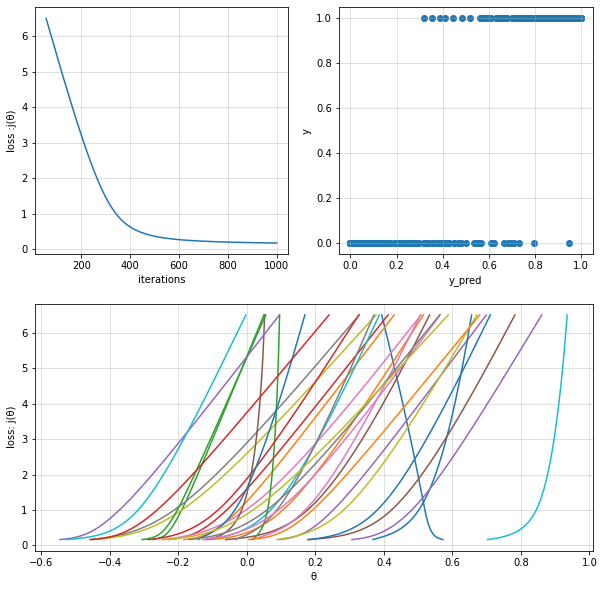

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score

scaler = StandardScaler()


X_i = df[dataset.feature_names].values
y = df["target"].values.reshape(-1,1)


X_scaled = scaler.fit_transform(X_i)

X,y,y_pred,theta,theta_history,cost_history = logistic_regression_fit( 
    X_i=X_scaled,
    y=y,
    alpha=0.003,
    iterations=1000
)

print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()



In [60]:
np.log(1 - y_pred)

array([[-0.20299164],
       [-0.27128834],
       [-0.22914761],
       ...,
       [-0.16609544],
       [-0.1036728 ],
       [-1.06645071]])

# Logistic Regression with Regularization

In [54]:
def logistic_regression_with_reg_fit(X_i,y,alpha = 0.01,iterations = 10000,penalty=0.1):    
    X = linear_model_format_X(X_i)
    
    n = X.shape[1]
    m = y.shape[0]
    
    theta = np.random.rand(1,n)
    print("random initial θ value :",theta)

    cost_history = []
    theta_history = []

    for iteration in range(iterations):

        # calculate y_pred 
        y_pred = sigmoid(X @ theta.T) # (m,1) = (m,n) * (n,1)

        # new θ to replace old θ
        new_theta = np.zeros_like(theta)     

        # simultaneous operation 
        new_theta = theta - (
            alpha * np.sum( (y_pred - y ) * X , axis = 0 ) * (1/m)
        ) -  (penalty * theta * (1 / m) ) 
        

        if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
            print("breaking. found inf or nan.")
            break
        # override new θ 
        theta = new_theta

        # calculate cost to put in history
        cost = entropy_cost_func( sigmoid(X @ theta.T), y)
        cost_history.append(cost)

        # calcualted theta in history
        theta_history.append(theta[0])
        
    y_pred = sigmoid(X @ theta.T)
    return X,y,y_pred,theta,theta_history,cost_history

random initial θ value : [[0.69797365 0.00684083 0.74572601 0.15430033 0.6401997  0.6874392
  0.43627835 0.99517944 0.76571511 0.47916801 0.40071367 0.79190814
  0.82797632 0.06334998 0.46430382 0.49991944 0.61878241 0.68588831
  0.83498746 0.85834201 0.17122925 0.61743687 0.83480799 0.58742252
  0.51343845 0.25949421 0.95972129 0.8965036  0.74198947 0.88797921
  0.66820595]]


<ipython-input-7-5ba05776049f>:4: RuntimeWarning: divide by zero encountered in log
  part_2 = (1 - y) * np.log(1 - y_pred)


Fit theta : [[ 0.70830948 -0.77382823 -0.40228974 -0.66604392 -0.17648983 -0.02316578
  -0.42234676 -0.14811222 -0.37324985 -0.26070558  0.19696735 -0.12783323
   0.24761635 -0.74632678 -0.28801001  0.12927267  0.04090683  0.10138608
   0.00734453  0.34306628 -0.07384633 -0.35352387 -0.47754958 -0.3887874
  -0.38384573 -0.62406174 -0.02015113 -0.24191673 -0.46949253 -0.18392407
  -0.03394854]]

Confusion Matrix : 
[[196  16]
 [  1 356]]
Accuracy Score   : 
0.9701230228471002



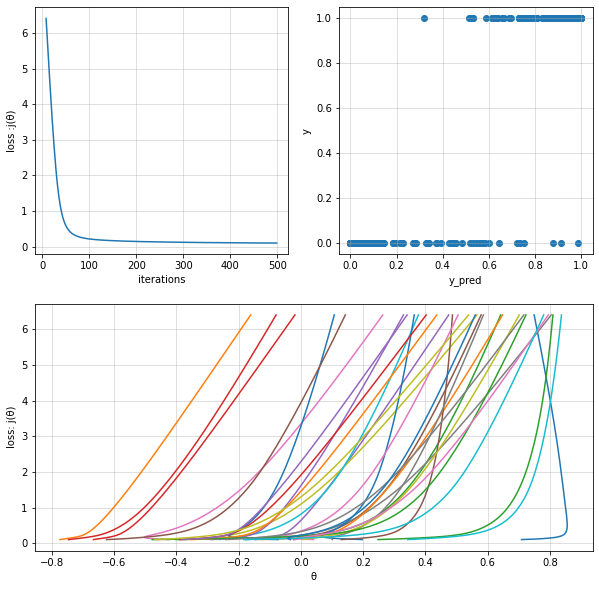

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score

scaler = StandardScaler()

X_i = df[dataset.feature_names].values
y = df["target"].values.reshape(-1,1)


X_scaled = scaler.fit_transform(X_i)

X,y,y_pred,theta,theta_history,cost_history = logistic_regression_with_reg_fit( 
    X_i=X_scaled,
    y=y,
    alpha=0.03,
    iterations=500
)

print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()


## Comparing With Data

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score
from sklearn.compose import ColumnTransformer

In [25]:
churn_df = pd.read_csv("./dataset/ChurnClassification.csv")

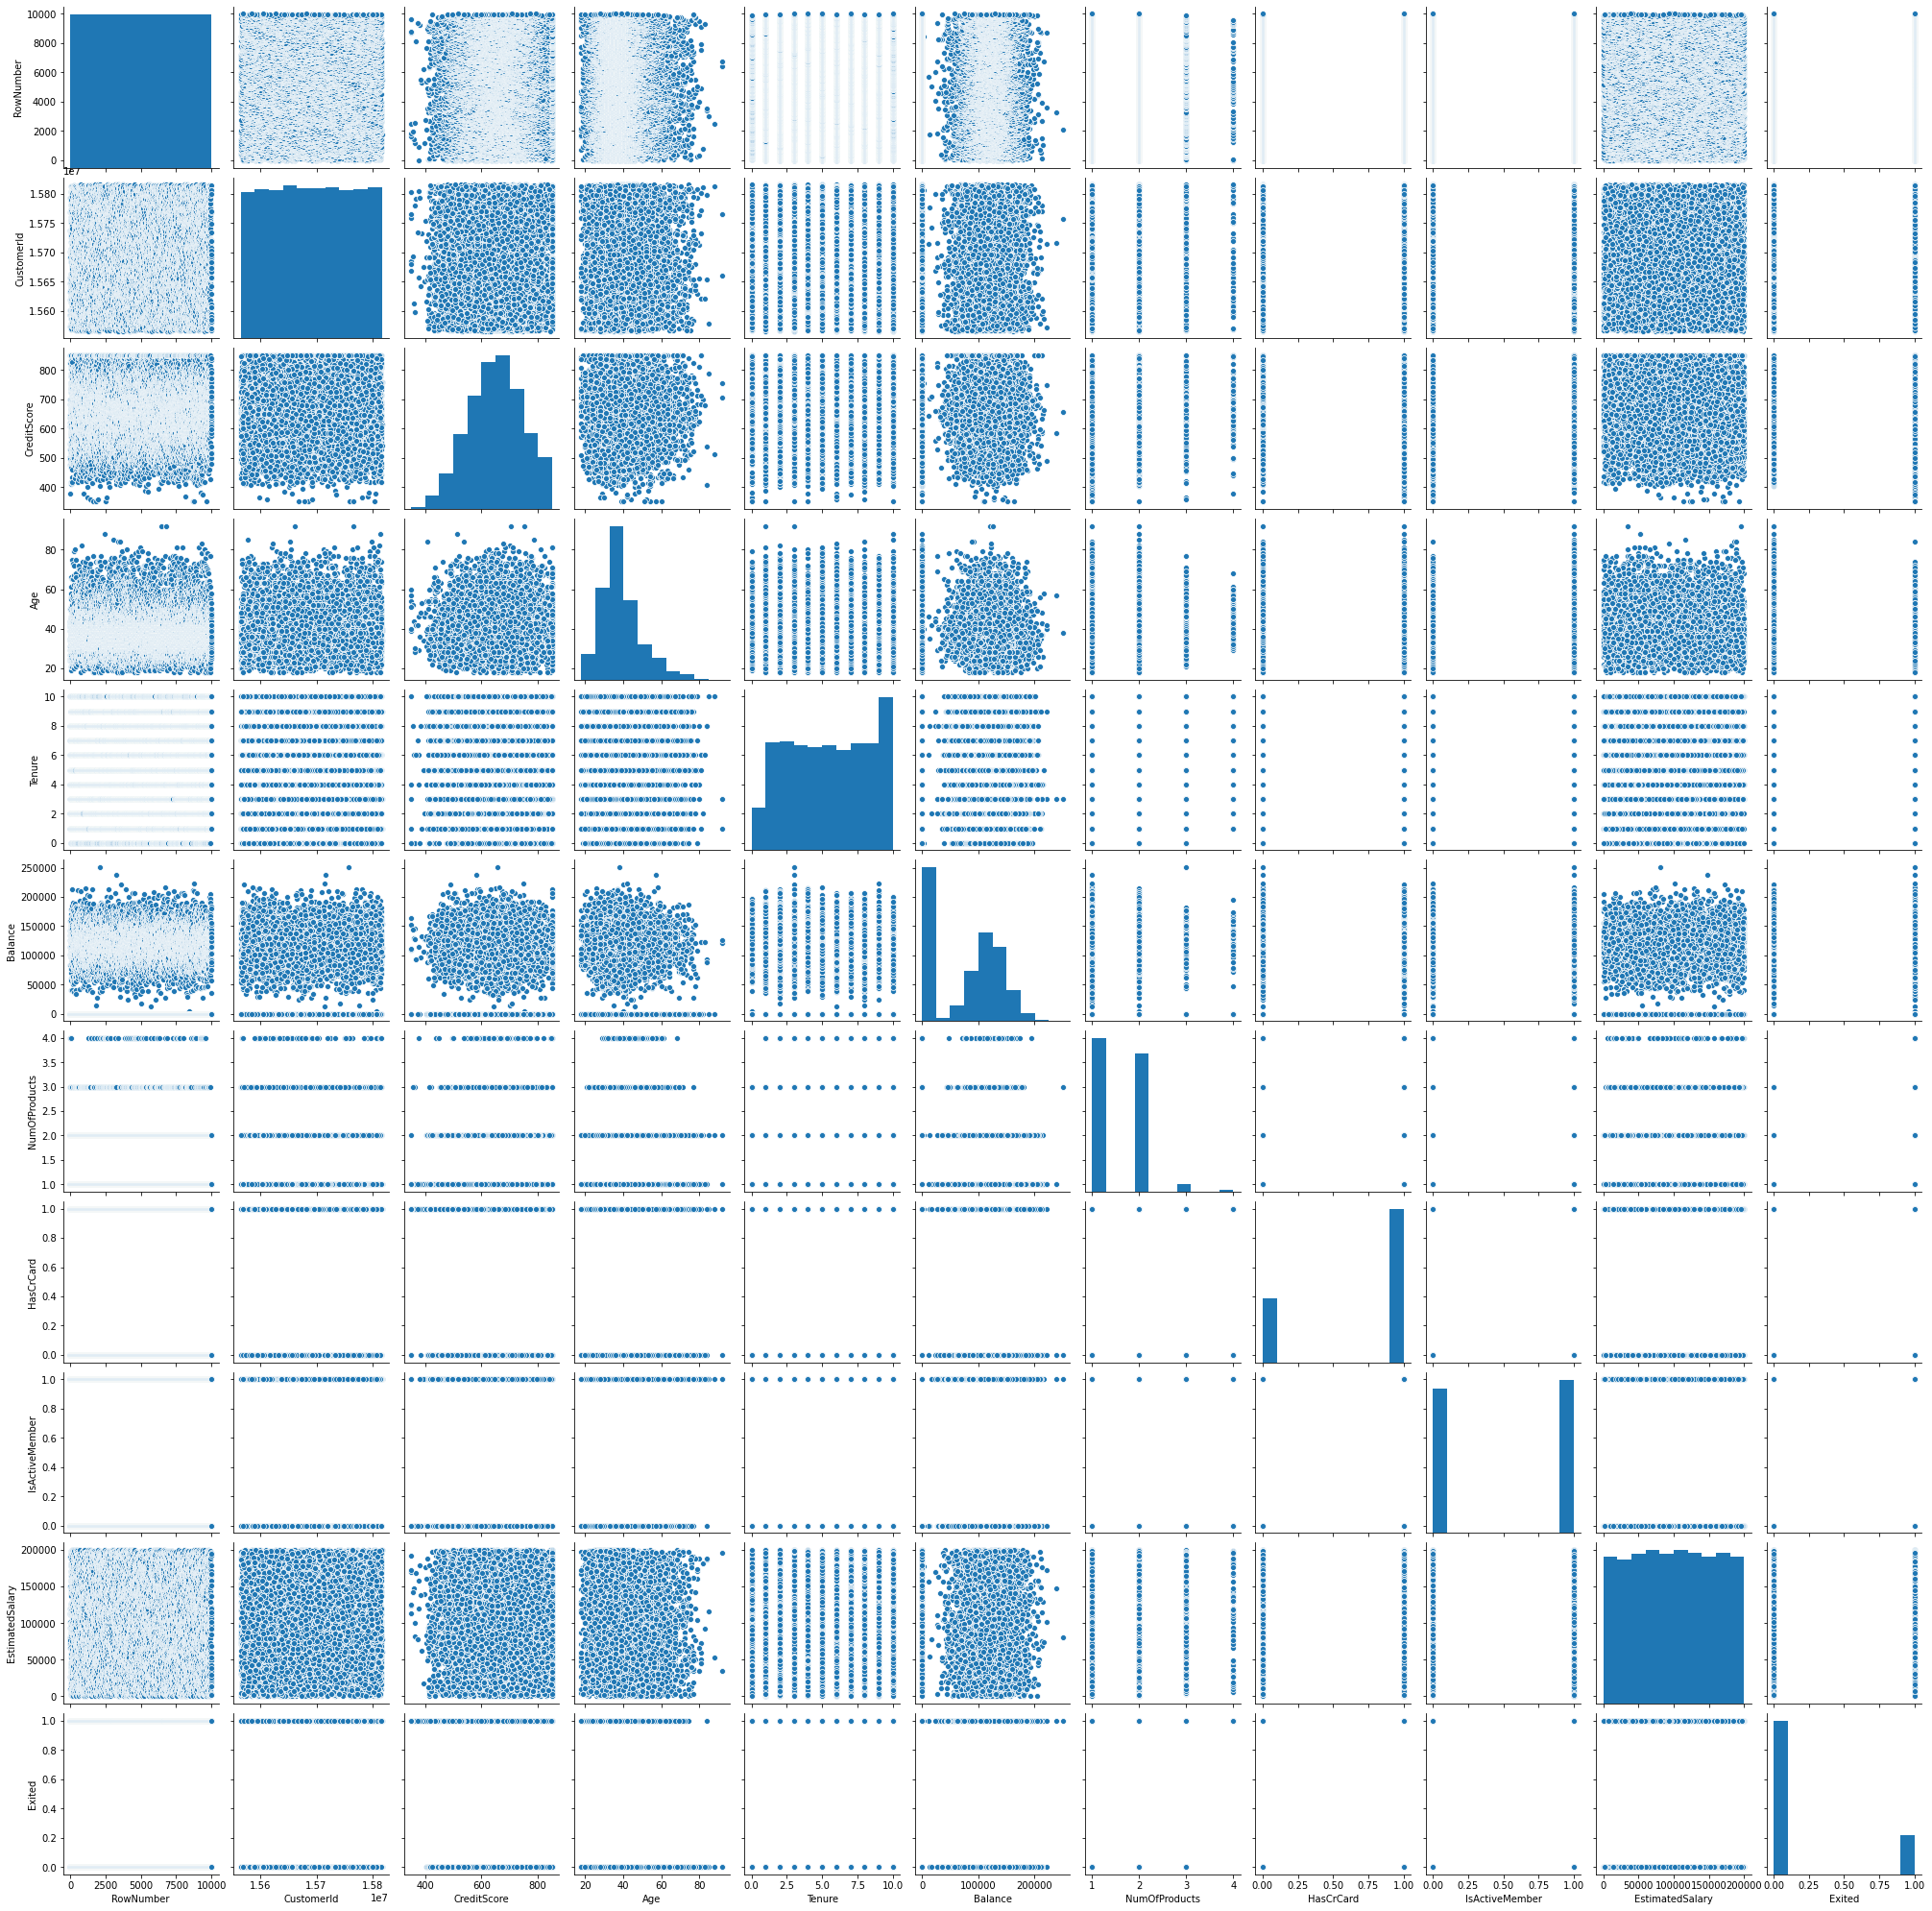

In [23]:
sns.pairplot(churn_df)

In [40]:
churn_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [44]:
feature_col = ['CreditScore','Geography','Gender', 'Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
target_col = ['Exited']

X = churn_df[feature_col].values
y = churn_df[target_col].values
X,y

(array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
        [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
        [502, 'France', 'Female', ..., 1, 0, 113931.57],
        ...,
        [709, 'France', 'Female', ..., 0, 1, 42085.58],
        [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
        [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object),
 array([[1],
        [0],
        [1],
        ...,
        [1],
        [1],
        [0]]))

In [45]:
le_1 = LabelEncoder()
le_2 = LabelEncoder()
X[:, 1] = le_1.fit_transform(X[:, 1])
X[:, 2] = le_1.fit_transform(X[:, 2])
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [46]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Logisitic Regression without Regularization

random initial θ value : [[7.86543204e-04 3.79187592e-04 8.71098499e-04 7.66669302e-04
  6.29556657e-04 6.82673472e-04 9.09442040e-04 6.89012375e-04
  2.18336535e-05 6.99527770e-05 9.18108322e-04 4.91240622e-04
  9.33037714e-04]]
Fit theta : [[-1.57105594 -0.13481835  0.2290237  -0.07001283 -0.06807948 -0.25177126
   0.70196321 -0.0737086   0.14268002 -0.08233166 -0.02200612 -0.46802356
   0.02700149]]

Confusion Matrix : 
[[6150  218]
 [1306  326]]
Accuracy Score   : 
0.8095



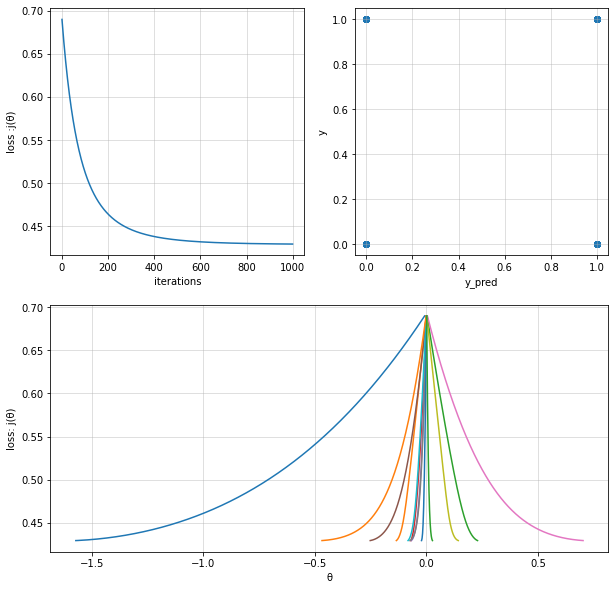

In [56]:
X,y,y_pred,theta,theta_history,cost_history = logistic_regression_fit( 
    X_i=X_train,
    y=y_train,
    alpha=0.03,
    iterations=1000
)

print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred>0.5,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

random initial θ value : [[0.99784393 0.69986893 0.18247394 0.61670082 0.30989424 0.00311514
  0.81800336 0.73252058 0.02594731 0.75569084 0.7675468  0.85661779
  0.45894821]]
Fit theta : [[-1.33231147  0.45243314  0.64478066  0.43254155 -0.03914994 -0.20526912
   0.62178916 -0.01168205  0.20918159  0.00592753  0.03825105 -0.31734554
   0.05257717]]

Confusion Matrix : 
[[6137  231]
 [1316  316]]
Accuracy Score   : 
0.806625



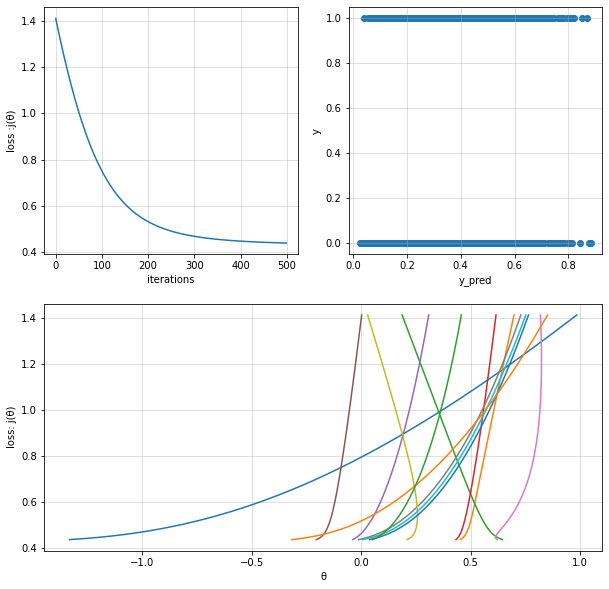

In [18]:
X,y,y_pred,theta,theta_history,cost_history = logistic_regression_with_reg_fit( 
    X_i=X_train,
    y=y_train,
    alpha=0.03,
    iterations=500
)

print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()